# Berchmans Kevin S


## HOUSE PRICE PREDICTION USING LR WITH REGULARIZATION

##### Step1.  [ Import Dataset ]

In [1]:
import pandas as pd

In [2]:
hpp = pd.read_csv('Ames_House_Sales_Cropped.csv')
hpp

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856,854,0,3,706,0,1,0,...,7,0,0,8,856,0,2003,2003,2008,208500
1,1Fam,Y,1262,0,0,3,978,0,0,1,...,6,0,0,6,1262,298,1976,1976,2007,181500
2,1Fam,Y,920,866,0,3,486,0,1,0,...,7,0,0,6,920,0,2001,2002,2008,223500
3,1Fam,Y,961,756,0,3,216,0,1,0,...,7,0,0,7,756,0,1915,1970,2006,140000
4,1Fam,Y,1145,1053,0,4,655,0,1,0,...,8,0,0,9,1145,192,2000,2000,2008,250000
5,1Fam,Y,796,566,320,1,732,0,1,0,...,5,0,0,5,796,40,1993,1995,2009,143000
6,1Fam,Y,1694,0,0,3,1369,0,1,0,...,8,0,0,7,1686,255,2004,2005,2007,307000
7,1Fam,Y,1107,983,0,3,859,32,1,0,...,7,0,0,7,1107,235,1973,1973,2009,200000
8,1Fam,Y,1022,752,0,2,0,0,0,0,...,7,0,0,8,952,90,1931,1950,2008,129900
9,2fmCon,Y,1077,0,0,2,851,0,1,0,...,5,0,0,5,991,0,1939,1950,2008,118000


In [3]:
hpp.head()

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856,854,0,3,706,0,1,0,...,7,0,0,8,856,0,2003,2003,2008,208500
1,1Fam,Y,1262,0,0,3,978,0,0,1,...,6,0,0,6,1262,298,1976,1976,2007,181500
2,1Fam,Y,920,866,0,3,486,0,1,0,...,7,0,0,6,920,0,2001,2002,2008,223500
3,1Fam,Y,961,756,0,3,216,0,1,0,...,7,0,0,7,756,0,1915,1970,2006,140000
4,1Fam,Y,1145,1053,0,4,655,0,1,0,...,8,0,0,9,1145,192,2000,2000,2008,250000


In [4]:
hpp.head(8)

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856,854,0,3,706,0,1,0,...,7,0,0,8,856,0,2003,2003,2008,208500
1,1Fam,Y,1262,0,0,3,978,0,0,1,...,6,0,0,6,1262,298,1976,1976,2007,181500
2,1Fam,Y,920,866,0,3,486,0,1,0,...,7,0,0,6,920,0,2001,2002,2008,223500
3,1Fam,Y,961,756,0,3,216,0,1,0,...,7,0,0,7,756,0,1915,1970,2006,140000
4,1Fam,Y,1145,1053,0,4,655,0,1,0,...,8,0,0,9,1145,192,2000,2000,2008,250000
5,1Fam,Y,796,566,320,1,732,0,1,0,...,5,0,0,5,796,40,1993,1995,2009,143000
6,1Fam,Y,1694,0,0,3,1369,0,1,0,...,8,0,0,7,1686,255,2004,2005,2007,307000
7,1Fam,Y,1107,983,0,3,859,32,1,0,...,7,0,0,7,1107,235,1973,1973,2009,200000


In [5]:
hpp.shape

(1379, 39)

In [6]:
hpp.columns

Index(['BldgType', 'CentralAir', '1stFlrSF', '2ndFlrSF', '3SsnPorch',
       'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
       'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass',
       'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF',
       'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold', 'SalePrice'],
      dtype='object')

In [7]:
hpp.dtypes

BldgType          object
CentralAir        object
1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtUnfSF          int64
EnclosedPorch      int64
Fireplaces         int64
FullBath           int64
GarageArea         int64
GarageCars         int64
GarageYrBlt        int64
GrLivArea          int64
HalfBath           int64
KitchenAbvGr       int64
LotArea            int64
LotFrontage      float64
LowQualFinSF       int64
MSSubClass         int64
MasVnrArea         int64
MiscVal            int64
MoSold             int64
OpenPorchSF        int64
OverallCond        int64
OverallQual        int64
PoolArea           int64
ScreenPorch        int64
TotRmsAbvGrd       int64
TotalBsmtSF        int64
WoodDeckSF         int64
YearBuilt          int64
YearRemodAdd       int64
YrSold             int64
SalePrice          int64
dtype: object

In [8]:
hpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 39 columns):
BldgType         1379 non-null object
CentralAir       1379 non-null object
1stFlrSF         1379 non-null int64
2ndFlrSF         1379 non-null int64
3SsnPorch        1379 non-null int64
BedroomAbvGr     1379 non-null int64
BsmtFinSF1       1379 non-null int64
BsmtFinSF2       1379 non-null int64
BsmtFullBath     1379 non-null int64
BsmtHalfBath     1379 non-null int64
BsmtUnfSF        1379 non-null int64
EnclosedPorch    1379 non-null int64
Fireplaces       1379 non-null int64
FullBath         1379 non-null int64
GarageArea       1379 non-null int64
GarageCars       1379 non-null int64
GarageYrBlt      1379 non-null int64
GrLivArea        1379 non-null int64
HalfBath         1379 non-null int64
KitchenAbvGr     1379 non-null int64
LotArea          1379 non-null int64
LotFrontage      1379 non-null float64
LowQualFinSF     1379 non-null int64
MSSubClass       1379 non-null int64
M

In [9]:
hpp['BldgType'].value_counts()

1Fam      1166
TwnhsE     113
Duplex      40
Twnhs       38
2fmCon      22
Name: BldgType, dtype: int64

In [10]:
hpp['1stFlrSF'].value_counts()

864     21
1040    15
912     13
894     12
848     12
672      9
816      8
832      7
483      7
960      7
764      6
728      6
1056     6
936      6
1728     6
1072     5
630      5
804      5
1494     5
616      5
1236     5
1314     5
882      5
1422     5
988      5
990      5
1026     5
1144     5
840      5
1392     5
        ..
1240     1
1241     1
1242     1
1090     1
1244     1
1247     1
1248     1
1249     1
1251     1
1256     1
1260     1
1261     1
1265     1
1274     1
1279     1
1281     1
1282     1
1283     1
1284     1
1285     1
1287     1
1288     1
1297     1
1299     1
1304     1
1307     1
1309     1
1318     1
1319     1
2053     1
Name: 1stFlrSF, Length: 738, dtype: int64

##### Step2.  [ Predict Sale Price without Categorical features ] 

In [11]:
q1 = hpp.drop(['BldgType','CentralAir'], axis=1)
q1

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856,854,0,3,706,0,1,0,150,0,...,7,0,0,8,856,0,2003,2003,2008,208500
1,1262,0,0,3,978,0,0,1,284,0,...,6,0,0,6,1262,298,1976,1976,2007,181500
2,920,866,0,3,486,0,1,0,434,0,...,7,0,0,6,920,0,2001,2002,2008,223500
3,961,756,0,3,216,0,1,0,540,272,...,7,0,0,7,756,0,1915,1970,2006,140000
4,1145,1053,0,4,655,0,1,0,490,0,...,8,0,0,9,1145,192,2000,2000,2008,250000
5,796,566,320,1,732,0,1,0,64,0,...,5,0,0,5,796,40,1993,1995,2009,143000
6,1694,0,0,3,1369,0,1,0,317,0,...,8,0,0,7,1686,255,2004,2005,2007,307000
7,1107,983,0,3,859,32,1,0,216,228,...,7,0,0,7,1107,235,1973,1973,2009,200000
8,1022,752,0,2,0,0,0,0,952,205,...,7,0,0,8,952,90,1931,1950,2008,129900
9,1077,0,0,2,851,0,1,0,140,0,...,5,0,0,5,991,0,1939,1950,2008,118000


In [12]:
hpp.pop('BldgType')

0         1Fam
1         1Fam
2         1Fam
3         1Fam
4         1Fam
5         1Fam
6         1Fam
7         1Fam
8         1Fam
9       2fmCon
10        1Fam
11        1Fam
12        1Fam
13        1Fam
14        1Fam
15        1Fam
16        1Fam
17      Duplex
18        1Fam
19        1Fam
20        1Fam
21        1Fam
22        1Fam
23      TwnhsE
24        1Fam
25        1Fam
26        1Fam
27        1Fam
28        1Fam
29        1Fam
         ...  
1349      1Fam
1350      1Fam
1351      1Fam
1352      1Fam
1353    TwnhsE
1354      1Fam
1355      1Fam
1356      1Fam
1357      1Fam
1358      1Fam
1359      1Fam
1360      1Fam
1361      1Fam
1362      1Fam
1363    TwnhsE
1364      1Fam
1365      1Fam
1366      1Fam
1367      1Fam
1368      1Fam
1369      1Fam
1370      1Fam
1371      1Fam
1372    TwnhsE
1373      1Fam
1374      1Fam
1375      1Fam
1376      1Fam
1377      1Fam
1378      1Fam
Name: BldgType, Length: 1379, dtype: object

In [13]:
hpp.pop('CentralAir')

0       Y
1       Y
2       Y
3       Y
4       Y
5       Y
6       Y
7       Y
8       Y
9       Y
10      Y
11      Y
12      Y
13      Y
14      Y
15      Y
16      Y
17      Y
18      Y
19      Y
20      Y
21      Y
22      Y
23      Y
24      Y
25      Y
26      Y
27      Y
28      Y
29      N
       ..
1349    Y
1350    Y
1351    Y
1352    Y
1353    Y
1354    Y
1355    Y
1356    Y
1357    Y
1358    Y
1359    Y
1360    Y
1361    Y
1362    Y
1363    Y
1364    Y
1365    N
1366    Y
1367    Y
1368    Y
1369    Y
1370    N
1371    Y
1372    Y
1373    Y
1374    Y
1375    Y
1376    Y
1377    Y
1378    Y
Name: CentralAir, Length: 1379, dtype: object

In [14]:
X = hpp.drop(['SalePrice'],axis=1)
X

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,706,0,1,0,150,0,...,5,7,0,0,8,856,0,2003,2003,2008
1,1262,0,0,3,978,0,0,1,284,0,...,8,6,0,0,6,1262,298,1976,1976,2007
2,920,866,0,3,486,0,1,0,434,0,...,5,7,0,0,6,920,0,2001,2002,2008
3,961,756,0,3,216,0,1,0,540,272,...,5,7,0,0,7,756,0,1915,1970,2006
4,1145,1053,0,4,655,0,1,0,490,0,...,5,8,0,0,9,1145,192,2000,2000,2008
5,796,566,320,1,732,0,1,0,64,0,...,5,5,0,0,5,796,40,1993,1995,2009
6,1694,0,0,3,1369,0,1,0,317,0,...,5,8,0,0,7,1686,255,2004,2005,2007
7,1107,983,0,3,859,32,1,0,216,228,...,6,7,0,0,7,1107,235,1973,1973,2009
8,1022,752,0,2,0,0,0,0,952,205,...,5,7,0,0,8,952,90,1931,1950,2008
9,1077,0,0,2,851,0,1,0,140,0,...,6,5,0,0,5,991,0,1939,1950,2008


In [15]:
y = hpp["SalePrice"]
y

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1349    140000
1350    119000
1351    182900
1352    192140
1353    143750
1354     64500
1355    186500
1356    160000
1357    174000
1358    120500
1359    394617
1360    149700
1361    197000
1362    191000
1363    149300
1364    310000
1365    121000
1366    179600
1367    129000
1368    157900
1369    240000
1370    112000
1371    287090
1372    145000
1373    185000
1374    175000
1375    210000
1376    266500
1377    142125
1378    147500
Name: SalePrice, Length: 1379, dtype: int64

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test,=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
X_train

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1193,1337,0,0,2,266,0,1,0,1139,0,...,5,6,0,0,5,1405,144,1998,1999,2008
910,1800,0,0,2,0,0,0,0,1800,0,...,5,9,0,0,7,1800,288,2007,2007,2009
1068,1328,653,0,4,622,0,1,0,500,0,...,3,4,0,0,7,1122,431,1928,1950,2009
1196,2018,0,0,3,0,0,0,0,2002,0,...,5,9,0,0,10,2002,144,2008,2009,2010
1102,959,712,0,3,786,0,1,0,173,0,...,5,6,0,0,7,959,0,2000,2000,2006
447,970,0,0,2,630,0,1,0,340,0,...,6,5,0,192,5,970,0,1963,1963,2007
796,1701,0,0,3,1390,0,1,0,0,0,...,5,5,0,0,6,1390,0,1975,1981,2007
543,1320,0,0,3,328,551,1,0,285,240,...,6,5,0,0,6,1164,160,1966,1966,2006
901,768,0,0,2,660,0,0,1,108,0,...,8,5,0,0,5,768,192,1972,2003,2009
968,1264,0,0,3,697,0,1,0,571,0,...,5,5,0,143,6,1268,0,1960,1960,2010


In [19]:
y_train

1193    181000
910     239000
1068    135000
1196    378500
1102    173000
447     132500
796     171000
543     164500
901     133900
968     167500
411     119000
96      118964
429      98000
361      76000
933     197000
588     139900
156     128500
528     170000
654      89000
857     255000
1237    179200
534     316600
1078    424870
1190    128900
1312    131000
371     129000
677     143000
308      78000
1371    287090
710     212000
         ...  
474     289000
856     128000
747     194500
252     266000
21      139400
1337    175900
459     175000
1184    165400
276     152000
955      85000
1215    190000
385     339750
805     170000
343     190000
769     137000
1332    230000
130     231500
871     201000
1123    168000
87      163500
330     190000
1238    335000
466      91300
121     226000
1044    325000
1095    146000
1130    144000
1294    165500
860     174000
1126    165000
Name: SalePrice, Length: 1034, dtype: int64

In [20]:
X_test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
599,1518,0,0,1,1218,0,0,0,300,0,...,5,8,0,0,6,1518,185,2003,2004,2008
881,925,0,0,2,338,466,0,1,121,0,...,6,5,0,0,5,925,0,1965,1965,2009
634,1095,679,0,4,0,0,1,0,1095,90,...,2,4,0,0,8,1095,0,1900,1950,2006
425,888,868,0,3,742,0,1,0,130,0,...,5,6,0,0,7,872,144,1996,1997,2007
906,1337,0,0,3,699,0,1,0,638,0,...,5,7,0,0,6,1337,0,2003,2003,2007
1079,672,252,0,2,348,0,1,0,324,0,...,4,4,0,0,5,672,0,1941,1950,2010
65,1479,0,0,3,1013,0,1,0,440,0,...,5,7,0,0,7,1453,144,2003,2003,2007
1351,1440,0,0,3,678,0,0,0,762,99,...,7,6,0,0,7,1440,0,1981,1981,2007
479,689,689,0,3,141,0,0,0,548,116,...,9,7,0,0,7,689,0,1928,2005,2008
67,1304,983,0,3,603,0,0,0,701,114,...,4,7,0,0,7,1304,0,1953,1953,2006


In [21]:
y_test

599     274000
881     117500
634      87000
425     204000
906     185000
1079     80000
65      226000
1351    182900
479     161000
67      225000
939     121600
573     359100
917      99500
1054    318000
941     185000
1116    120000
237     230000
578     137500
772     224000
303     242000
953     135000
783     151000
339     156000
718     270000
208     386250
624     129000
1075    144000
1040    119500
575     313000
244     151000
         ...  
1334     90000
199     134450
367     119000
723     538000
354     148000
10      129500
147     320000
538     224500
282     205000
298     187500
522     113000
291     119900
503     188000
903     145000
930     117000
439     146500
1033    146000
331      95000
527     121500
462     115000
861     154300
630     165000
135     130000
358     127000
363     192000
618     197900
561     114504
529     185000
567     220000
158     239000
Name: SalePrice, Length: 345, dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
model=LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
y_pred=model.predict(X_test)
y_pred

array([257434.93050744, 111083.73474785, 100018.05832285, 204028.53821287,
       207319.25418308,  38036.30928916, 234153.38582861, 205076.12689752,
       187014.12655254, 235636.7879903 , 100976.50943791, 304119.53647048,
       101769.64600699, 288758.4600158 , 204767.89337824, 145002.4727962 ,
       248322.97436853, 151533.68038629, 209697.39458739, 278312.23574242,
        93329.85601403, 153784.14868355, 163237.87451149, 241495.91212963,
       372429.94726962, 221672.07367176, 119658.75685684, 100039.78137061,
       319435.02892196, 172088.64665033, 258772.64470129, 199597.36129749,
       156349.69283166, 142311.2250009 , 204807.33161344, 379608.17785506,
       124176.23377582, 141127.25006079, 273832.43247534, 212547.04205579,
       169474.57176061, 123305.65719341, 200341.24016631, 377957.32307187,
       146941.71712444, 283693.48760682, 106694.19786716, 221733.02172145,
        87733.47014007, 295005.66546327, 125250.6201929 ,  53569.11256069,
       133831.05086041, 1

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [27]:
mse_ln=mean_squared_error(y_test,y_pred)
mse_ln

1474827325.5955148

In [28]:
print("MSE without Categorial Features:",mse_ln)

MSE without Categorial Features: 1474827325.5955148


##### Step3. [ Crteate Scatter Plot ]

In [29]:
import matplotlib.pyplot as plt

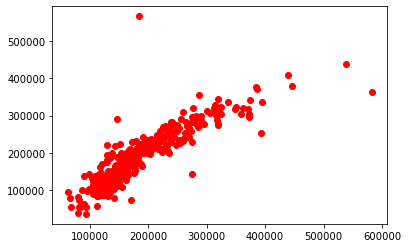

In [30]:
plt.scatter(y_test,y_pred,color='red')
plt.show()

In [34]:
hpp = pd.read_csv("Ames_House_Sales_Cropped.csv")
hpp

,BldgType,CentralAir,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,1Fam,Y,856,854,0,3,706,0,1,0,...,7,0,0,8,856,0,2003,2003,2008,208500
1,1Fam,Y,1262,0,0,3,978,0,0,1,...,6,0,0,6,1262,298,1976,1976,2007,181500
2,1Fam,Y,920,866,0,3,486,0,1,0,...,7,0,0,6,920,0,2001,2002,2008,223500
3,1Fam,Y,961,756,0,3,216,0,1,0,...,7,0,0,7,756,0,1915,1970,2006,140000
4,1Fam,Y,1145,1053,0,4,655,0,1,0,...,8,0,0,9,1145,192,2000,2000,2008,250000
5,1Fam,Y,796,566,320,1,732,0,1,0,...,5,0,0,5,796,40,1993,1995,2009,143000
6,1Fam,Y,1694,0,0,3,1369,0,1,0,...,8,0,0,7,1686,255,2004,2005,2007,307000
7,1Fam,Y,1107,983,0,3,859,32,1,0,...,7,0,0,7,1107,235,1973,1973,2009,200000
8,1Fam,Y,1022,752,0,2,0,0,0,0,...,7,0,0,8,952,90,1931,1950,2008,129900
9,2fmCon,Y,1077,0,0,2,851,0,1,0,...,5,0,0,5,991,0,1939,1950,2008,118000


##### Step4.  [ Encode Categorical Columns ]

In [35]:
dummy=pd.get_dummies(hpp,columns=['BldgType','CentralAir'])
dummy

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearRemodAdd,YrSold,SalePrice,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_N,CentralAir_Y
0,856,854,0,3,706,0,1,0,150,0,...,2003,2008,208500,1,0,0,0,0,0,1
1,1262,0,0,3,978,0,0,1,284,0,...,1976,2007,181500,1,0,0,0,0,0,1
2,920,866,0,3,486,0,1,0,434,0,...,2002,2008,223500,1,0,0,0,0,0,1
3,961,756,0,3,216,0,1,0,540,272,...,1970,2006,140000,1,0,0,0,0,0,1
4,1145,1053,0,4,655,0,1,0,490,0,...,2000,2008,250000,1,0,0,0,0,0,1
5,796,566,320,1,732,0,1,0,64,0,...,1995,2009,143000,1,0,0,0,0,0,1
6,1694,0,0,3,1369,0,1,0,317,0,...,2005,2007,307000,1,0,0,0,0,0,1
7,1107,983,0,3,859,32,1,0,216,228,...,1973,2009,200000,1,0,0,0,0,0,1
8,1022,752,0,2,0,0,0,0,952,205,...,1950,2008,129900,1,0,0,0,0,0,1
9,1077,0,0,2,851,0,1,0,140,0,...,1950,2008,118000,0,1,0,0,0,0,1
